In [1]:
%matplotlib inline


# Plot different SVM classifiers in the iris dataset


Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.




Automatically created module for IPython interactive environment


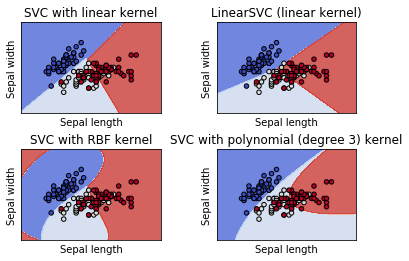

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [4]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

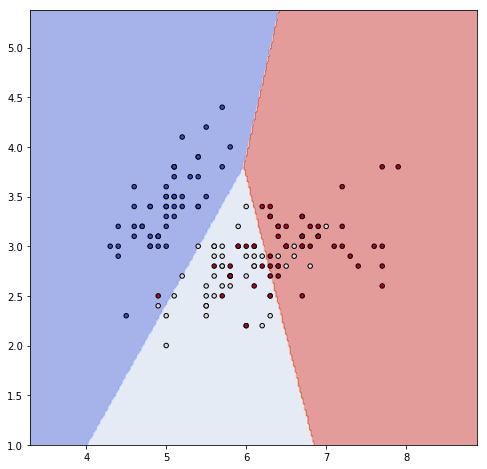

In [12]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
from sklearn.neighbors.nearest_centroid import NearestCentroid


clf = NearestCentroid()
clf.fit(X,y)

fig,ax = plt.subplots(figsize=(8,8))


X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)

#plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.5)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


#ax.set_xlim(xx.min(), xx.max())
    #ax.set_ylim(yy.min(), yy.max())
    #ax.set_xlabel('Sepal length')
    #ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    #ax.set_title(title)

plt.show()

C:\Users\tvlon\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: This function is deprecated. Please call randint(0, 512 + 1) instead
C:\Users\tvlon\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: This function is deprecated. Please call randint(0, 512 + 1) instead


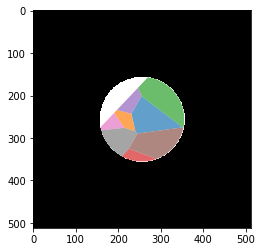

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.morphology import binary_erosion
from scipy.spatial import Voronoi
from shapely.geometry import Point, Polygon
from skimage import draw
from sklearn.neighbors import KDTree

def get_circular_se(radius=2):

    N = (radius * 2) + 1
    se = np.zeros(shape=[N,N])
    for i in range(N):
        for j in range(N):
                se[i,j] = (i - N / 2)**2 + (j - N / 2)**2 <= radius**2
    se = np.array(se, dtype="uint8")
    return se

def polygonize_by_nearest_neighbor(pp):
    """Takes a set of xy coordinates pp Numpy array(n,2) and reorders the array to make
    a polygon using a nearest neighbor approach.

    """

    # start with first index
    pp_new = np.zeros_like(pp)
    pp_new[0] = pp[0]
    p_current_idx = 0

    tree = KDTree(pp)

    for i in range(len(pp) - 1):

        nearest_dist, nearest_idx = tree.query([pp[p_current_idx]], k=4)  # k1 = identity
        nearest_idx = nearest_idx[0]

        # finds next nearest point along the contour and adds it
        for min_idx in nearest_idx[1:]:  # skip the first point (will be zero for same pixel)
            if not pp[min_idx].tolist() in pp_new.tolist():  # make sure it's not already in the list
                pp_new[i + 1] = pp[min_idx]
                p_current_idx = min_idx
                break

    pp_new[-1] = pp[0]
    return pp_new


#generates a circular mask
side_len = 512
rad = 100
mask = np.zeros(shape=(side_len, side_len))
rr, cc = draw.circle(side_len/2, side_len/2, radius=rad, shape=mask.shape)
mask[rr, cc] = 1

#makes a polygon from the mask perimeter
se = get_circular_se(radius=1)
contour = mask - binary_erosion(mask, structure=se)
pixels_mask = np.array(np.where(contour==1)[::-1]).T
polygon = polygonize_by_nearest_neighbor(pixels_mask)
polygon = Polygon(polygon)

#generates random seeds
ns=100
points_x = np.random.random_integers(0,side_len,ns)
points_y = np.random.random_integers(0,side_len,ns)
points = (np.vstack((points_x,points_y))).T

# returns a list of the centroids that are contained within the polygon
new_points = []
for point in points:
    if polygon.contains(Point(point)):
        new_points.append(point)

#performs voronoi tesselation
if len(points) > 3: #otherwise the tesselation won't work
    vor = Voronoi(new_points)
    regions, vertices = voronoi_finite_polygons_2d(vor)

    #clips tesselation to the mask
    new_vertices = []
    for region in regions:
        poly_reg = vertices[region]
        shape = list(poly_reg.shape)
        shape[0] += 1
        p = Polygon(np.append(poly_reg, poly_reg[0]).reshape(*shape)).intersection(polygon)
        poly = (np.array(p.exterior.coords)).tolist()
        new_vertices.append(poly)

    #plots the results
    fig, ax = plt.subplots()
    
    ax.imshow(mask,cmap='Greys_r')#,alpha=0.0)
    
    for poly in new_vertices:
        ax.fill(*zip(*poly), alpha=0.7)
        
    #ax.plot(points[:,0],points[:,1],'ro',ms=2)
    
    plt.show()

In [14]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [25]:
np.random.seed(1234)
points = np.random.rand(15, 2)

# compute Voronoi tesselation
vor = Voronoi(points)

In [47]:
regions, vertices = voronoi_finite_polygons_2d(vor)

In [48]:
print ("--")
print (regions)
print ("--")
print (vertices)

--
[[10, 15, 14, 21, 20], [19, 7, 12, 17], [22, 23, 4, 3, 0], [24, 14, 16, 18, 25], [5, 26, 27], [9, 1, 0, 3, 2, 8], [12, 7, 6, 4, 3, 2, 11], [13, 8, 2, 11], [28, 29, 0, 1], [18, 19, 7, 6, 5, 30, 31], [17, 12, 11, 13, 15, 14, 16], [32, 1, 9, 10, 33], [34, 35, 5, 6, 4], [19, 17, 16, 18], [15, 10, 9, 8, 13]]
--
[[ 0.51204146  0.28170809]
 [ 0.31568864  0.2231658 ]
 [ 0.60181497  0.48198612]
 [ 0.61195783  0.46638446]
 [ 0.76349576  0.49961565]
 [ 0.86163554  0.77300743]
 [ 0.82428491  0.74711566]
 [ 0.5955872   0.86737793]
 [ 0.3398531   0.5360898 ]
 [ 0.20717026  0.45505837]
 [ 0.19839983  0.46568522]
 [ 0.54203769  0.60556533]
 [ 0.52991347  0.64525971]
 [ 0.34632775  0.58619376]
 [ 0.28095359  0.68979933]
 [ 0.27956806  0.65401536]
 [ 0.32776593  0.71199644]
 [ 0.40994669  0.69667456]
 [ 0.41517255  1.51501742]
 [ 0.46233568  1.32637502]
 [-1.51846216  1.25291487]
 [-1.42673123  1.49674306]
 [ 1.80180548 -1.09809421]
 [ 2.5145059  -0.20841621]
 [-1.42673123  1.49674306]
 [ 0.11182282 

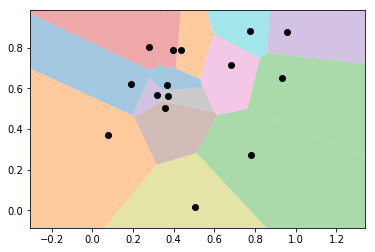

In [49]:
# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.axis('equal')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

#plt.savefig('voro.png')
plt.show()

In [50]:
len(vertices)

36